# Data statistics
We want to calculates basic statistics of data that we crawled.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import zscore

First we must load our data,
The data is crawled in 2021-2-12
and it contains all real state ads on Divar.ir for the past month.

In [3]:
df = pd.read_json('../data/21-2-12/output.json')
df = df.drop(['token','location'], axis=1)
df.head(5)

,district,sub_category,category,business_type,price,credit,rent,title,area,year,room,floor,elevator,parking,storage,balcony,agency
0,پرند,apartment-sell,residential-sell,personal,2.400000e+08,NaN,NaN,هسا فول واریزی,84.0,1399.0,2.0,3.0,False,True,True,NaN,NaN
1,ستارخان,shop-rent,commercial-rent,personal,NaN,NaN,NaN,15 متر مغازه(زیر همکف) پاساژ طلا و جواهر الماس...,15.0,1390.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,الهیه,office-rent,commercial-rent,personal,NaN,NaN,NaN,فرشته اجاره۶۶متر سنداداری,66.0,1397.0,0.0,6.0,True,True,False,NaN,NaN
3,فیروزکوه,house-villa-sell,residential-sell,personal,4.000000e+09,NaN,NaN,ویلا باغ زریندشت فیروزکوه,1300.0,1395.0,3.0,NaN,NaN,True,True,1.0,NaN
4,ورامین,suite-apartment,temporary-rent,personal,NaN,NaN,NaN,اجاره سوییت,2000.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


Now we get a description of our data

In [5]:
df.describe(include='all')

,district,sub_category,category,business_type,price,credit,rent,title,area,year,room,floor,elevator,parking,storage,balcony,agency
count,372332,372332,372332,372306,1.543680e+05,9.042300e+04,6.976900e+04,372332,3.595020e+05,332001.000000,335572.000000,284958.000000,284972,299400,299356,14415.000000,137056
unique,365,38,15,2,NaN,NaN,NaN,344873,NaN,NaN,NaN,NaN,4,4,4,NaN,1638
top,سعادت‌آباد,apartment-sell,residential-sell,personal,NaN,NaN,NaN,آپارتمان,NaN,NaN,NaN,NaN,True,True,True,NaN,🔚املاک بزرگ کارو🔜
freq,18972,195497,229135,234964,NaN,NaN,NaN,198,NaN,NaN,NaN,NaN,223873,247765,264868,NaN,1888
mean,NaN,NaN,NaN,NaN,6.179658e+09,4.728308e+08,1.962926e+07,NaN,1.208036e+03,1391.006907,2.031740,3.359007,NaN,NaN,NaN,0.718141,NaN
std,NaN,NaN,NaN,NaN,1.938364e+10,1.068774e+09,4.024619e+08,NaN,6.329088e+04,7.619782,0.942701,2.758968,NaN,NaN,NaN,0.449921,NaN
min,NaN,NaN,NaN,NaN,2.500000e+05,0.000000e+00,0.000000e+00,NaN,1.000000e+00,1370.000000,0.000000,-1.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,1.060000e+09,1.000000e+08,1.500000e+06,NaN,7.000000e+01,1385.000000,1.000000,2.000000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,2.400000e+09,2.300000e+08,4.500000e+06,NaN,1.000000e+02,1393.000000,2.000000,3.000000,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,5.250000e+09,5.000000e+08,1.100000e+07,NaN,1.520000e+02,1398.000000,3.000000,4.000000,NaN,NaN,NaN,1.000000,NaN


Let's see what categories we have

In [48]:
df.category.value_counts()
# df.sub_category.value_counts()

apartment-sell                        195497
apartment-rent                         82577
plot-old                               21948
office-rent                            12643
house-villa-sell                       11690
presell                                11017
shop-rent                               8575
shop-sell                               8188
office-sell                             6680
industry-agriculture-business-sell      4257
house-villa-rent                        3568
partnership                             1755
suite-apartment                         1593
industry-agriculture-business-rent      1478
villa                                    590
workspace                                229
services                                  14
accounting-finance-legal                   6
batch                                      3
care-health-beauty                         2
jobs                                       2
businesses                                 2
residentia

Let's analyze `residential-sell` category a bit deeper.

In [4]:
df_residential_sell =  df[df['category'].str.contains("residential-sell")]

Well we want to see relation between area and price. And we remove outliers with a simple z-score

In [11]:
df_price_and_area = df_residential_sell[['price','area']].dropna()
df_price_and_area_without_outliers = df_price_and_area[(np.abs(zscore(df_price_and_area)) < 3).all(axis=1)]

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Now we draw the chart

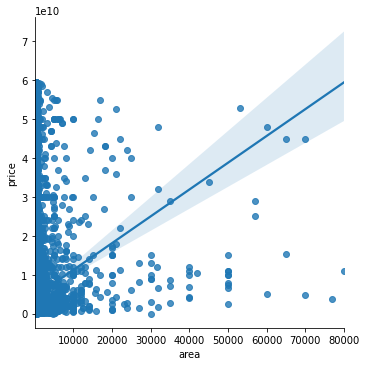

In [10]:
sns.lmplot(x='area',y='price',data=df_price_and_area_without_outliers)


Lets get mean house price per district

<AxesSubplot:xlabel='price', ylabel='district'>

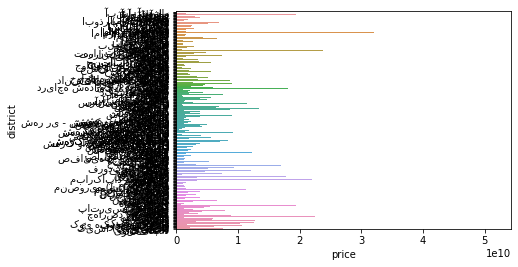

In [45]:
mean_price_per_district = df_residential_sell[['price','district']].dropna().groupby('district').mean()
mean_price_per_district.sort_values(['price'])

So `اتحاد` has some expensive houses This time lets calculates price per area

In [37]:
mean_price_and_area_per_district = df_residential_sell[['price','area','district']].dropna().groupby('district').mean()
mean_price_and_area_per_district['price/area'] = mean_price_and_area_per_district.apply( lambda row: row['price']/row['area'], axis=1)
mean_price_and_area_per_district.sort_values(['price/area'])

,price,area,price/area
district,,,
شهرک شهید باقری,3.053433e+09,8011.280488,3.811417e+05
سبلان,1.813034e+09,4161.848361,4.356319e+05
ورامین,1.287709e+09,2464.417495,5.225207e+05
رودهن,4.289617e+09,7073.879877,6.064023e+05
شریف‌آباد,8.696223e+08,1213.430168,7.166645e+05
...,...,...,...
الهیه,2.888725e+10,292.965179,9.860303e+07
دروس,2.095241e+10,206.580941,1.014247e+08
شهرک غرب,2.090855e+10,204.162475,1.024113e+08


Wow!! mean price per meter in `حصار بوعلی` is 113.282.200 Toman.

Let's see how many of apartments in sell or rent category have elevator.

In [52]:
df_apartments =  df[df['sub_category'].str.contains("apartment-sell")| df['sub_category'].str.contains("apartment-rent")]
pd.notna(df_apartments['elevator']).value_counts()

True     266761
False     11313
Name: elevator, dtype: int64

There are a lot of info that could be extracted from this dataset. So start creating notebooks :)